In [15]:
import cv2
import skimage
import numpy as np
import matplotlib.pyplot as plt

In [16]:
image = r"C:\Users\batkm\Documents\Github\2024-25b-fai2-adsai-MichalBatkowski1232079\Deliverables\task 8\Kaggle Dataset\test_image_10.png"
im1 = cv2.imread('im1.png', 0)
im2 = cv2.imread('im2.png', 0)
im3 = cv2.imread('im3.png', 0)
im4 = cv2.imread('im4.png', 0)
im5 = cv2.imread(image, 0)

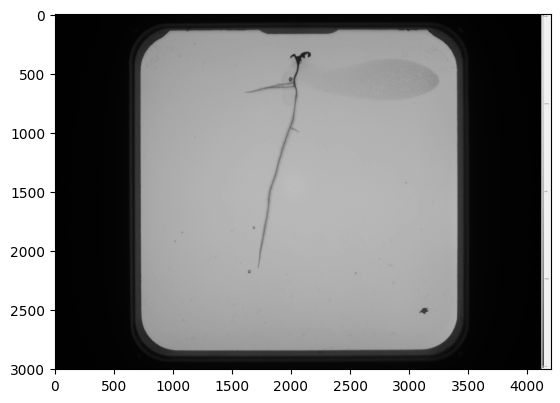

In [17]:
plt.imshow(im1, cmap='gray')

Text(0.5, 0, 'Pixel location on the blue line')

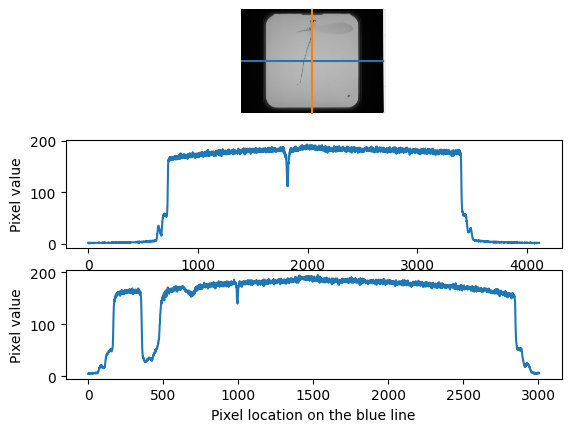

In [18]:
fig, ax = plt.subplots(3)

ax[0].imshow(im1, cmap='gray')
ax[0].plot([0, 4112], [1503, 1503])
ax[0].plot([2056, 2056], [0, 3006])
ax[0].axis('off')

ax[1].plot(im1[1503, 0:4112])
ax[1].set_ylabel('Pixel value')
ax[1].set_xlabel('Pixel location on the blue line')

ax[2].plot(im1[0:3006, 2056])
ax[2].set_ylabel('Pixel value')
ax[2].set_xlabel('Pixel location on the blue line')

In [19]:
im1.shape

(3006, 4202)

### Functions for edge detection along horizontal and vertical lines, function to output sliced coordinates of the found edges

Horizontal edges: Left X = 722, Right X = 3409
Vertical edges: Top Y = 166, Bottom Y = 2852


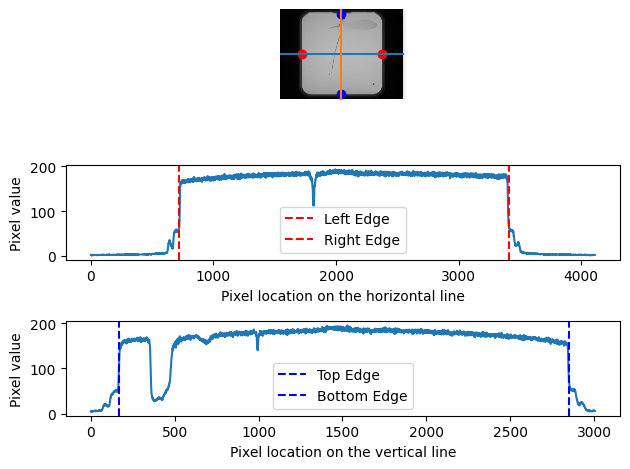

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Threshold for detecting the edge
threshold = 70

# Horizontal and vertical lines to analyze
horizontal_line = im1[1503, 0:4112]  # Pixel values along the horizontal line
vertical_line = im1[0:3006, 2056]    # Pixel values along the vertical line

# Function to find edges by looping through the line
def find_edges(line, threshold):
    left_edge, right_edge = None, None
    n = len(line)
    
    # Loop from the left to find the first transition
    for i in range(1, n):
        if line[i-1] < threshold <= line[i] or line[i-1] >= threshold > line[i]:
            left_edge = i
            break
    
    # Loop from the right to find the last transition
    for i in range(n-1, 0, -1):
        if line[i] < threshold <= line[i-1] or line[i] >= threshold > line[i-1]:
            right_edge = i
            break
    
    return left_edge, right_edge

# Function to return a slice of found edges
def format(image):
    horizontal_line = image[1503, 0:4112]  
    vertical_line = image[0:3006, 2056]  
    left_x, right_x = find_edges(horizontal_line, threshold)
    top_y, bottom_y = find_edges(vertical_line, threshold)
    # Ensure the output region is a square
    side_length = max(right_x - left_x, bottom_y - top_y)
    right_x = left_x + side_length
    bottom_y = top_y + side_length
    return slice(top_y, bottom_y), slice(left_x, right_x)


# Analyze the horizontal line (x-coordinates)
left_x, right_x = find_edges(horizontal_line, threshold)

# Analyze the vertical line (y-coordinates)
top_y, bottom_y = find_edges(vertical_line, threshold)

# Output the coordinates
print(f"Horizontal edges: Left X = {left_x}, Right X = {right_x}")
print(f"Vertical edges: Top Y = {top_y}, Bottom Y = {bottom_y}")

# Visualization (Showcasing how the edge detection works based on the pixel value plots)
fig, ax = plt.subplots(3)

# Display the image with detected edges
ax[0].imshow(im1, cmap='gray')
ax[0].plot([0, 4112], [1503, 1503], label='Horizontal line')
ax[0].plot([2056, 2056], [0, 3006], label='Vertical line')
if left_x is not None and right_x is not None:
    ax[0].scatter([left_x, right_x], [1503, 1503], color='red', label='Horizontal edges')
if top_y is not None and bottom_y is not None:
    ax[0].scatter([2056, 2056], [top_y, bottom_y], color='blue', label='Vertical edges')

ax[0].axis('off')

# Horizontal line plot
ax[1].plot(horizontal_line)
if left_x is not None:
    ax[1].axvline(left_x, color='red', linestyle='--', label='Left Edge')
if right_x is not None:
    ax[1].axvline(right_x, color='red', linestyle='--', label='Right Edge')
ax[1].set_ylabel('Pixel value')
ax[1].set_xlabel('Pixel location on the horizontal line')
ax[1].legend()

# Vertical line plot
ax[2].plot(vertical_line)
if top_y is not None:
    ax[2].axvline(top_y, color='blue', linestyle='--', label='Top Edge')
if bottom_y is not None:
    ax[2].axvline(bottom_y, color='blue', linestyle='--', label='Bottom Edge')
ax[2].set_ylabel('Pixel value')
ax[2].set_xlabel('Pixel location on the vertical line')
ax[2].legend()

plt.tight_layout()
plt.show()


### Image 1

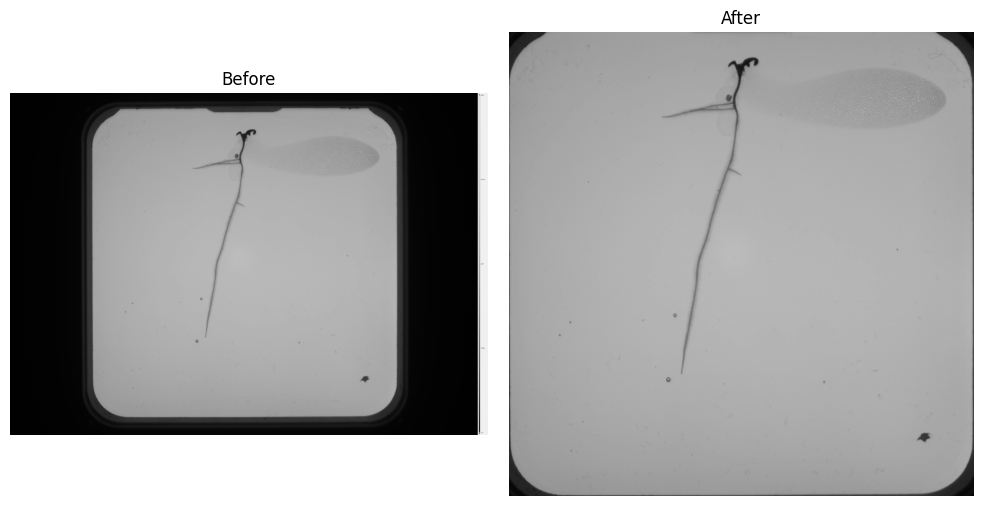

(2687, 2687)


In [21]:
cropped_im1 = im1[format(im1)]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
# Display the first image
axes[0].imshow(im1, cmap = 'gray')
axes[0].axis('off')  # Turn off axes
axes[0].set_title("Before")

# Display the second image
axes[1].imshow(cropped_im1, cmap = 'gray')
axes[1].axis('off')  # Turn off axes
axes[1].set_title("After")

# Adjust spacing and show the plot
plt.tight_layout()
plt.show()

print(cropped_im1.shape)

### Image 2

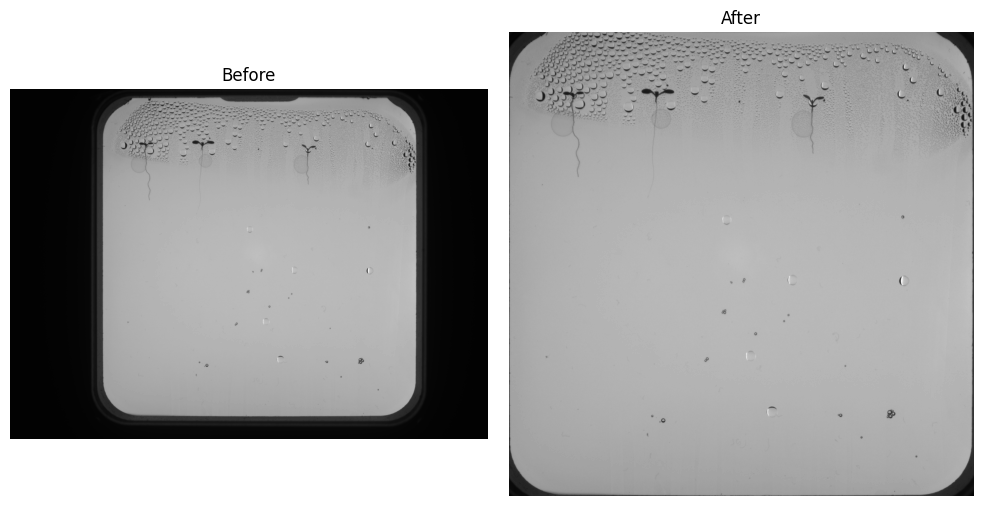

(2707, 2707)


In [22]:
cropped_im2 = im2[format(im2)]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
# Display the first image
axes[0].imshow(im2, cmap = 'gray')
axes[0].axis('off')  # Turn off axes
axes[0].set_title("Before")

# Display the second image
axes[1].imshow(cropped_im2, cmap = 'gray')
axes[1].axis('off')  # Turn off axes
axes[1].set_title("After")

# Adjust spacing and show the plot
plt.tight_layout()
plt.show()

print(cropped_im2.shape)

### Image 3

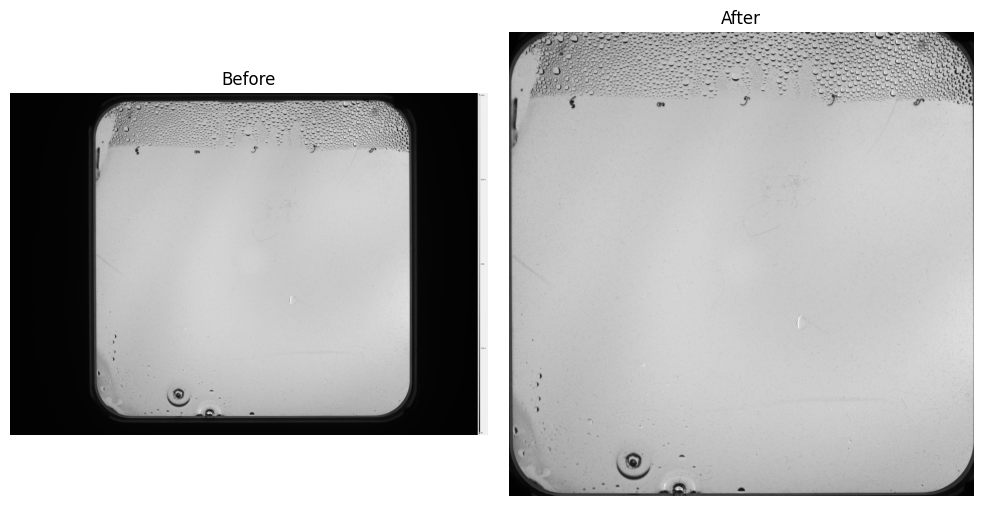

(2777, 2777)


In [23]:
cropped_im3 = im3[format(im3)]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
# Display the first image
axes[0].imshow(im3, cmap = 'gray')
axes[0].axis('off')  # Turn off axes
axes[0].set_title("Before")

# Display the second image
axes[1].imshow(cropped_im3, cmap = 'gray')
axes[1].axis('off')  # Turn off axes
axes[1].set_title("After")

# Adjust spacing and show the plot
plt.tight_layout()
plt.show()

print(cropped_im3.shape)

### Image 4

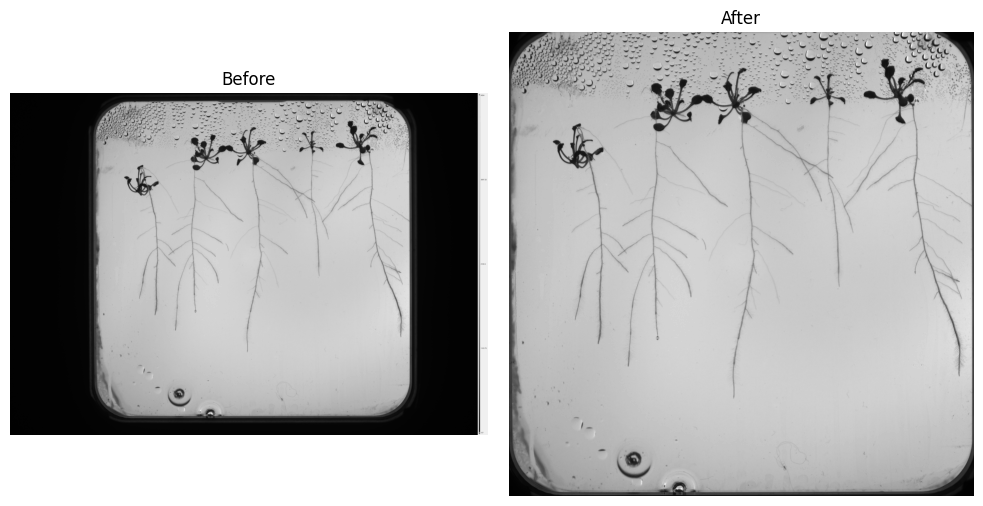

(2784, 2784)


In [24]:
cropped_im4 = im4[format(im4)]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
# Display the first image
axes[0].imshow(im4, cmap = 'gray')
axes[0].axis('off')  # Turn off axes
axes[0].set_title("Before")

# Display the second image
axes[1].imshow(cropped_im4, cmap = 'gray')
axes[1].axis('off')  # Turn off axes
axes[1].set_title("After")

# Adjust spacing and show the plot
plt.tight_layout()
plt.show()

print(cropped_im4.shape)

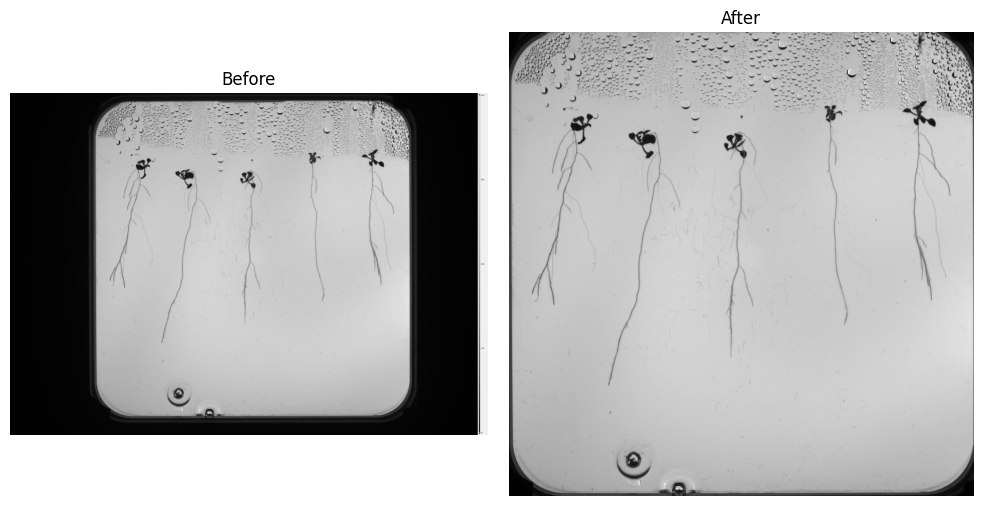

(2778, 2778)


In [25]:
cropped_im5 = im5[format(im5)]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
# Display the first image
axes[0].imshow(im5, cmap = 'gray')
axes[0].axis('off')  # Turn off axes
axes[0].set_title("Before")

# Display the second image
axes[1].imshow(cropped_im5, cmap = 'gray')
axes[1].axis('off')  # Turn off axes
axes[1].set_title("After")

# Adjust spacing and show the plot
plt.tight_layout()
plt.show()

print(cropped_im5.shape)